In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from costcla.metrics import cost_loss


In [2]:
data = pd.read_csv("data/fetal_health.csv")
# Split df into X and y
y = data['fetal_health']
X = data.drop('fetal_health', axis=1)
print(data.describe())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [3]:
rf_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_model, random_state=123).fit(X_test, y_test)

display(eli5.show_weights(perm, feature_names=X_train.columns.tolist(), top=24))
from eli5 import explain_prediction



eli5.show_prediction(rf_model, X_test.iloc[50], 
                     feature_names=X_test.columns.tolist(), show_feature_values=True)


Weight,Feature
0.0504 ± 0.0186,abnormal_short_term_variability
0.0274 ± 0.0066,percentage_of_time_with_abnormal_long_term_variability
0.0241 ± 0.0087,accelerations
0.0226 ± 0.0063,mean_value_of_short_term_variability
0.0105 ± 0.0094,histogram_mean
0.0083 ± 0.0070,uterine_contractions
0.0083 ± 0.0038,prolongued_decelerations
0.0064 ± 0.0056,histogram_median
0.0045 ± 0.0038,histogram_number_of_peaks
0.0030 ± 0.0038,light_decelerations


In [4]:

from eli5 import explain_prediction


eli5.show_prediction(rf_model, X_test.iloc[50], 
                     feature_names=X_test.columns.tolist(), show_feature_values=True)

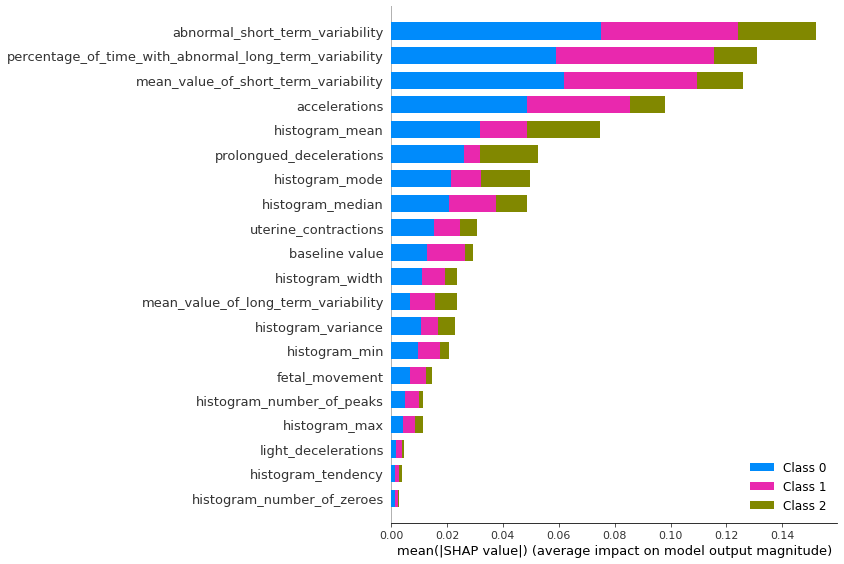

In [5]:
import shap

rf_model = RandomForestClassifier(n_estimators = 200, min_samples_split= 10, min_samples_leaf =  1, max_features = 'auto', max_depth =  20, bootstrap =  False, random_state=0).fit(X_train, y_train)


explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

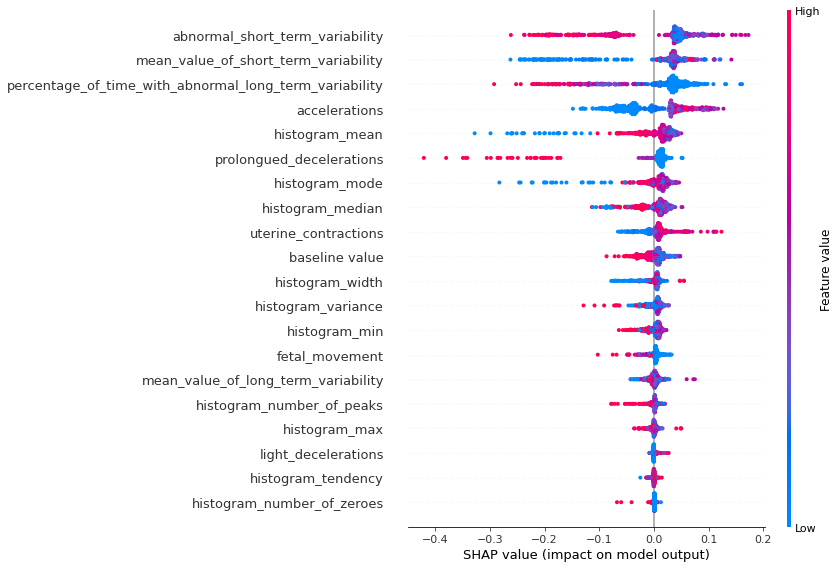

In [6]:
shap.summary_plot(shap_values[0], X_test)

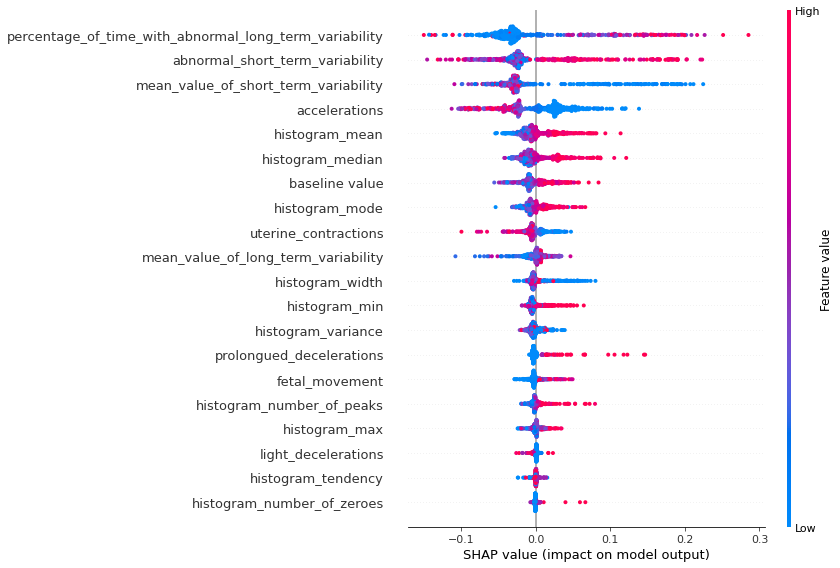

In [7]:
shap.summary_plot(shap_values[1], X_test)

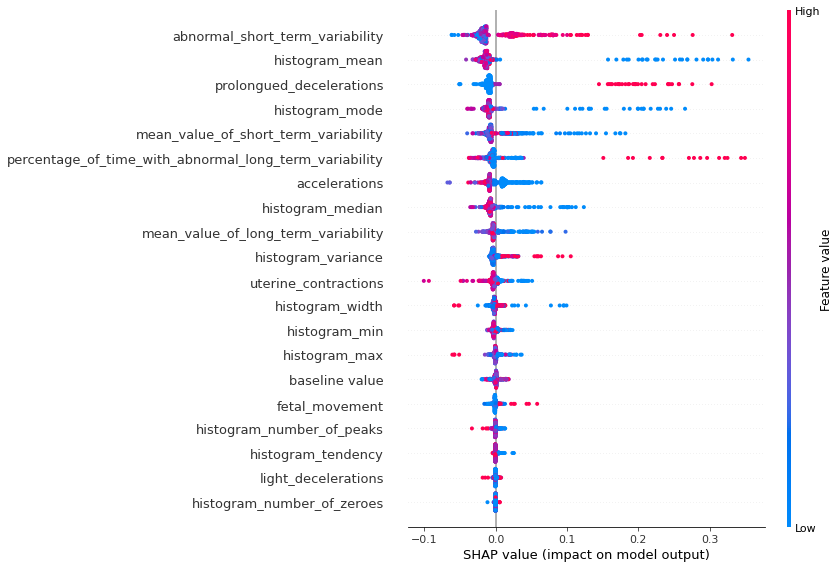

In [8]:
shap.summary_plot(shap_values[2], X_test)